TP Nº 1 - ANALISIS DEL SET DE DATOS DE NAVENT

In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


ModuleNotFoundError: No module named 'seaborn'

In [3]:
data_postulant_education= pd.read_csv('datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
data_postulant_education.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [4]:
data_postulation= pd.read_csv('datos_navent_fiuba/fiuba_4_postulaciones.csv')
data_postulation.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [5]:
data_postulant_sex_age= pd.read_csv('datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
data_postulant_sex_age.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [6]:
data_views =  pd.read_csv('datos_navent_fiuba/fiuba_3_vistas.csv')
data_views.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [7]:
data_ads_online = pd.read_csv('datos_navent_fiuba/fiuba_5_avisos_online.csv')
data_ads_online.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [8]:
data_ads_details= pd.read_csv('datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
data_ads_details.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


ANALISIS DEL AREA CON MAS PUBLICACIONES

In [9]:
publication_area = data_ads_details["nombre_area"].value_counts()

In [10]:
top10_publication_area = publication_area[:10]
top10_publication_area 

Ventas                   1659
Comercial                 983
Administración            901
Producción                821
Programación              576
Contabilidad              416
Tecnologia / Sistemas     388
Atención al Cliente       347
Mantenimiento             324
Recursos Humanos          235
Name: nombre_area, dtype: int64

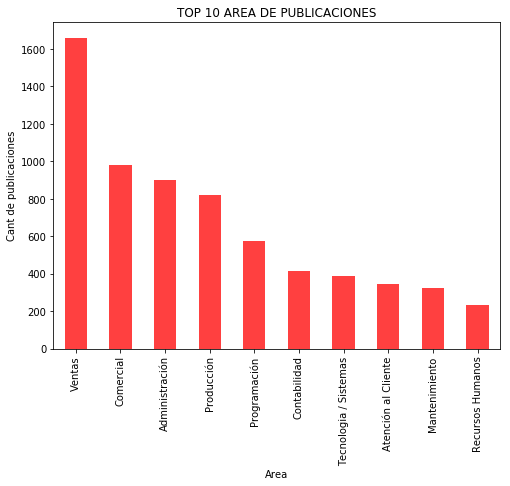

In [11]:
f = plt.figure()

plt.title ('TOP 10 AREA DE PUBLICACIONES',color='black')

ax = top10_publication_area.plot(kind='bar', stacked=True, figsize=(8,6) ,alpha=0.75, ax=f.gca(), color='red')


ax.set_ylabel('Cant de publicaciones')
ax.set_xlabel("Area")
plt.show()

ANALISIS DEL NIVEL EDUCATIVO DE LOS POSTULANTES

In [12]:
postulant_education = data_postulant_education["nombre"].value_counts()

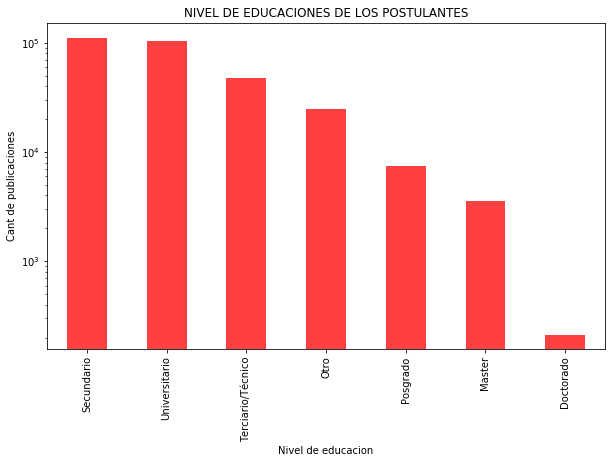

In [13]:
f = plt.figure()

plt.title ('NIVEL DE EDUCACIONES DE LOS POSTULANTES',color='black')

ax = postulant_education.plot(kind='bar', stacked=True, figsize=(10,6) ,alpha=0.75, ax=f.gca(), color='red', logy= True )


ax.set_ylabel('Cant de publicaciones')
ax.set_xlabel("Nivel de educacion")
plt.show()

ANALISIS LA EDAD DE LOS POSTULANTES

In [14]:
data_postulant_sex_age["fechanacimiento"].isnull().value_counts()

False    196138
True       4750
Name: fechanacimiento, dtype: int64

In [15]:
dates_without_nulls = data_postulant_sex_age["fechanacimiento"].dropna(how = "any")



In [16]:
dates_without_nulls  = dates_without_nulls.map(lambda x:str(x))
dates_without_nulls  = dates_without_nulls.map(lambda x: int(x[0:4]))
dates_without_nulls = dates_without_nulls[(dates_without_nulls > 1948) & (dates_without_nulls < 2000)]



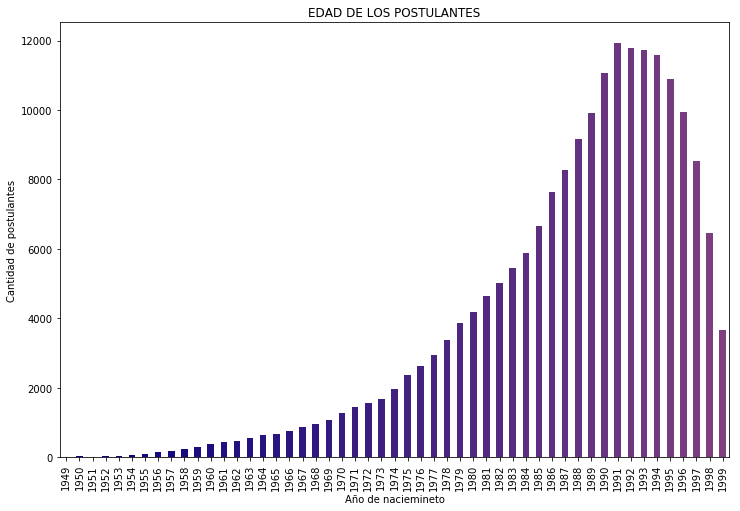

In [17]:
dates = dates_without_nulls.value_counts()


my_colors = [(x/100.0, x/200.0, 0.5) for x in range(len(dates))]


plt.title ('EDAD DE LOS POSTULANTES',color='black')

ax = dates.sort_index().plot(kind='bar',rot=90,figsize=(12,8),color=my_colors )


ax.set_ylabel('Cantidad de postulantes')
ax.set_xlabel("Año de naciemineto")
plt.show()

ANALISIS DE LA CANTIDAD HORAS LABORALES

In [90]:
data_ads_details['tipo_de_trabajo'].value_counts()

Full-time          12339
Part-time            863
Teletrabajo          110
Por Horas             63
Pasantia              63
Temporario            42
Por Contrato          37
Fines de Semana       14
Primer empleo          3
Name: tipo_de_trabajo, dtype: int64

In [19]:
#filtramos por alumnos universitarios y siguen en curso  
univ_not_finished = data_postulant_education[(data_postulant_education['nombre']=='Universitario') & (data_postulant_education['estado']=='En Curso')]
univ_not_finished.head()

,idpostulante,nombre,estado
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
8,Y043Z,Universitario,En Curso
9,6M3jr,Universitario,En Curso


In [20]:
#filtramos por postulantes en el rango de edades de 18 a 16
data_postulant_sex_age['fechanacimiento'] = pd.to_datetime(data_postulant_sex_age['fechanacimiento'], format = '%Y-%m-%d',errors = 'coerce')
data_age1826 = data_postulant_sex_age[(data_postulant_sex_age['fechanacimiento'].dt.year > 1992) & (data_postulant_sex_age['fechanacimiento'].dt.year < 2000)]
data_age1826.head()

,idpostulante,fechanacimiento,sexo
2272,NzqmoV,1995-01-16,FEM
6821,65lY6R,1993-09-13,FEM
7988,ZrzORR,1998-05-02,FEM
9855,8V5rEj,1993-02-24,FEM
11127,epMXVj,1994-05-18,MASC


In [21]:
#merge entre ambas tablas anteriores
univ_age = pd.merge(univ_not_finished,data_age1826, on='idpostulante')
univ_age.head()

,idpostulante,nombre,estado,fechanacimiento,sexo
0,8V5rEj,Universitario,En Curso,1993-02-24,FEM
1,NWzZmD,Universitario,En Curso,1996-02-19,MASC
2,a83VGJ,Universitario,En Curso,1995-09-26,FEM
3,ND46Px,Universitario,En Curso,1993-09-26,FEM
4,Z054eR,Universitario,En Curso,1993-01-20,MASC


In [22]:
#DataFrame que relaciona con los idavisos y tipo de trabajo
data_details = data_ads_details[['idaviso','tipo_de_trabajo']]
data_details.head()

,idaviso,tipo_de_trabajo
0,8725750,Full-time
1,17903700,Full-time
2,1000150677,Full-time
3,1000610287,Full-time
4,1000872556,Full-time


In [23]:
#merge entre las tablas anteriores
avisos_merge = pd.merge(data_details,data_postulation, on= 'idaviso')
avisos_merge.head()

,idaviso,tipo_de_trabajo,idpostulante,fechapostulacion
0,8725750,Full-time,4rWEjrA,2018-01-16 21:58:40
1,8725750,Full-time,qewD0aR,2018-02-06 15:51:54
2,8725750,Full-time,3N2dBdq,2018-02-08 10:49:43
3,8725750,Full-time,0zkx2dY,2018-02-07 06:32:25
4,8725750,Full-time,ZDrdPVR,2018-01-15 09:23:40


In [24]:
#merge para obtener los postulantes universitarios en curso y el tipo de trabajo a postularse
final_merge = pd.merge(univ_age, avisos_merge, on='idpostulante')
final_merge.head(20)

,idpostulante,nombre,estado,fechanacimiento,sexo,idaviso,tipo_de_trabajo,fechapostulacion
0,8V5rEj,Universitario,En Curso,1993-02-24,FEM,1112216861,Part-time,2018-01-22 10:03:22
1,8V5rEj,Universitario,En Curso,1993-02-24,FEM,1112280067,Full-time,2018-01-30 12:42:05
2,8V5rEj,Universitario,En Curso,1993-02-24,FEM,1112286523,Full-time,2018-01-30 12:40:41
3,8V5rEj,Universitario,En Curso,1993-02-24,FEM,1112345893,Full-time,2018-02-27 10:53:06
4,8V5rEj,Universitario,En Curso,1993-02-24,FEM,1112293018,Full-time,2018-01-30 12:40:30
5,8V5rEj,Universitario,En Curso,1993-02-24,FEM,1112296264,Full-time,2018-01-30 12:39:35
6,8V5rEj,Universitario,En Curso,1993-02-24,FEM,1112355872,Full-time,2018-02-27 10:52:24
7,8V5rEj,Universitario,En Curso,1993-02-24,FEM,1112357818,Full-time,2018-02-27 10:51:59
8,8V5rEj,Universitario,En Curso,1993-02-24,FEM,1112260584,Part-time,2018-01-22 10:03:07
9,8V5rEj,Universitario,En Curso,1993-02-24,FEM,1112337868,Full-time,2018-02-27 10:54:40


In [25]:
final_merge['tipo_de_trabajo'].value_counts()

Full-time          312677
Part-time           90439
Pasantia             6959
Temporario           1201
Por Horas            1118
Teletrabajo           529
Por Contrato          382
Fines de Semana       200
Primer empleo          31
Name: tipo_de_trabajo, dtype: int64

In [26]:
work_by_shift_times = final_merge['tipo_de_trabajo'].value_counts()
work_by_shift_times

Full-time          312677
Part-time           90439
Pasantia             6959
Temporario           1201
Por Horas            1118
Teletrabajo           529
Por Contrato          382
Fines de Semana       200
Primer empleo          31
Name: tipo_de_trabajo, dtype: int64

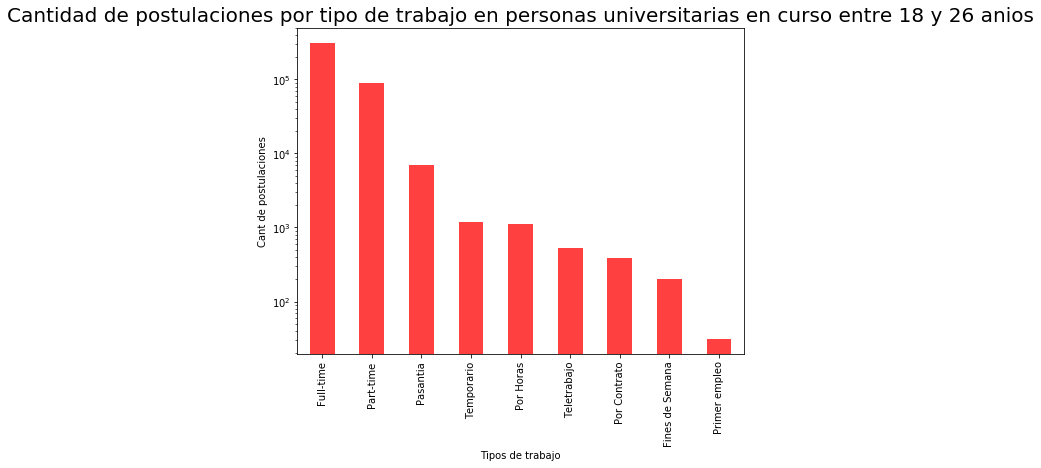

In [27]:
#Grafico obtenido 
final_merge_plot = plt.figure()

plt.title ('Cantidad de postulaciones por tipo de trabajo en personas universitarias en curso entre 18 y 26 anios',color='black', size = 20)

ax = work_by_shift_times.plot(kind='bar', stacked=True, figsize=(8,6) ,alpha=0.75, color='red', logy=True)


ax.set_ylabel('Cant de postulaciones')
ax.set_xlabel("Tipos de trabajo")
plt.show()

ANALISIS DE POSTULACION RELACIONANDO RANGO DE EDAD Y NIVEL LABORAL 

In [66]:
data_ads_details['nivel_laboral'].value_counts()

Senior / Semi-Senior                    9407
Junior                                  2216
Otro                                     921
Jefe / Supervisor / Responsable          809
Gerencia / Alta Gerencia / Dirección     181
Name: nivel_laboral, dtype: int64

In [67]:
data_ads_details['nivel_laboral'].describe()

count                    13534
unique                       5
top       Senior / Semi-Senior
freq                      9407
Name: nivel_laboral, dtype: object

In [69]:
data_ads_details['nivel_laboral'].isnull().value_counts()

False    13534
Name: nivel_laboral, dtype: int64

In [70]:
#me quedo con los postulantes de edaddes entre 44 y 69
data_postulant_sex_age['fechanacimiento'] = pd.to_datetime(data_postulant_sex_age['fechanacimiento'], format = '%Y-%m-%d-%h',errors = 'coerce')
data_age4069 = data_postulant_sex_age[(data_postulant_sex_age['fechanacimiento'].dt.year > 1949) & (data_postulant_sex_age['fechanacimiento'].dt.year < 1974)]
data_age4069.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
3,NdJl,1969-05-09,MASC
5,Ez8J,1968-12-18,MASC
6,aOQq,1966-07-16,MASC


In [72]:
data_details1 = data_ads_details[['idaviso','nivel_laboral']]
data_details1.head()

,idaviso,nivel_laboral
0,8725750,Senior / Semi-Senior
1,17903700,Senior / Semi-Senior
2,1000150677,Senior / Semi-Senior
3,1000610287,Senior / Semi-Senior
4,1000872556,Senior / Semi-Senior


In [73]:
final_merge1 = pd.merge(postulations_from44_to69,data_details1, on='idaviso')
final_merge1.head()

,idaviso,idpostulante,fechanacimiento,nivel_laboral
0,1112257047,NM5M,1970-12-03,Otro
1,1112257047,YjQdLPJ,1966-12-27,Otro
2,1112257047,ZDrdPkE,1950-07-09,Otro
3,1112257047,ow21KBe,1969-11-18,Otro
4,1112257047,lDLl8Bj,1962-11-07,Otro


In [64]:
#cuenta de la edad  de los postulantes
final_merge1['anios'] = final_merge1['fechanacimiento'].map(lambda x: 2018 - x.year)
final_merge1['nivel_laboral'].head()

0    Otro
1    Otro
2    Otro
3    Otro
4    Otro
Name: nivel_laboral, dtype: object

In [75]:

work_level = final_merge1['nivel_laboral'].value_counts()

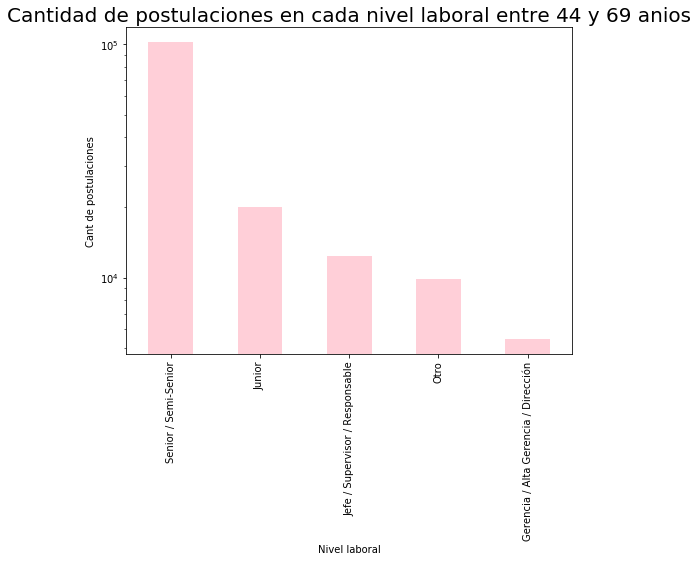

In [88]:
#Grafico obtenido 
#Grafico obtenido HEATMAP

fi = plt.figure()

plt.title ('Cantidad de postulaciones en cada nivel laboral entre 44 y 69 anios',color='black', size = 20)

ap = work_level.plot(kind='bar', stacked=True, figsize=(8,6) ,alpha=0.75, color='pink', logy=True)


ap.set_ylabel('Cant de postulaciones')
ap.set_xlabel("Nivel laboral")
plt.show()


In [78]:
#me quedo con los postulantes con edades de 18 a 44
data_age1844 = data_postulant_sex_age[(data_postulant_sex_age['fechanacimiento'].dt.year >= 1974) & (data_postulant_sex_age['fechanacimiento'].dt.year < 2000)]
data_age1844.head()

,idpostulante,fechanacimiento,sexo
2,ZaO5,1978-08-10,FEM
4,eo2p,1981-02-16,MASC
7,8BkL,1976-07-21,FEM
8,1d2B,1976-02-28,MASC
9,NPBx,1981-03-09,MASC


In [79]:
postulations_from18_to44 = pd.merge(data_postulation,data_age1844, on='idpostulante')


postulations_from18_to44 = postulations_from18_to44[['idaviso','idpostulante','fechanacimiento']]
postulations_from18_to44.head()

,idaviso,idpostulante,fechanacimiento
0,1112286523,ZaO5,1978-08-10
1,1112272060,ZaO5,1978-08-10
2,1112288401,ZaO5,1978-08-10
3,1112300563,ZaO5,1978-08-10
4,1112293018,ZaO5,1978-08-10


In [80]:
data_details2 = data_ads_details[['idaviso','nivel_laboral']]
data_details2.head()

,idaviso,nivel_laboral
0,8725750,Senior / Semi-Senior
1,17903700,Senior / Semi-Senior
2,1000150677,Senior / Semi-Senior
3,1000610287,Senior / Semi-Senior
4,1000872556,Senior / Semi-Senior


In [81]:
final_merge2 = pd.merge(postulations_from18_to44,data_details2, on='idaviso')
final_merge2.head()

,idaviso,idpostulante,fechanacimiento,nivel_laboral
0,1112286523,ZaO5,1978-08-10,Senior / Semi-Senior
1,1112286523,5kD2Pk,1983-07-29,Senior / Semi-Senior
2,1112286523,8Mv18l,1974-12-17,Senior / Semi-Senior
3,1112286523,aOoA2m,1979-01-21,Senior / Semi-Senior
4,1112286523,6Zwkj3,1975-02-05,Senior / Semi-Senior


In [82]:
#calculo edad de los postulantes
final_merge2['anios'] = final_merge2['fechanacimiento'].map(lambda x: 2018 - x.year)
final_merge2['nivel_laboral'].head()

0    Senior / Semi-Senior
1    Senior / Semi-Senior
2    Senior / Semi-Senior
3    Senior / Semi-Senior
4    Senior / Semi-Senior
Name: nivel_laboral, dtype: object

In [85]:
work_level2=final_merge2['nivel_laboral'].value_counts()

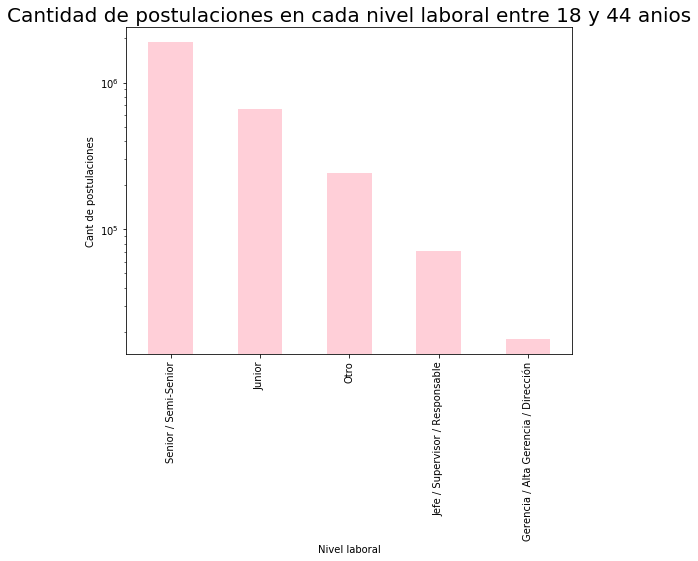

In [89]:
#Grafico obtenido HEATMAP

fig = plt.figure()

plt.title ('Cantidad de postulaciones en cada nivel laboral entre 18 y 44 anios',color='black', size = 20)

ap1 = work_level2.plot(kind='bar', stacked=True, figsize=(8,6) ,alpha=0.75, color='pink', logy=True)


ap1.set_ylabel('Cant de postulaciones')
ap1.set_xlabel("Nivel laboral")
plt.show()

HORARIO DE MAS VISITAS

In [91]:
data_views.head()


,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [93]:
data_views['timestamp'].head()

0    2018-02-23T13:38:13.187-0500
1    2018-02-23T13:38:14.296-0500
2    2018-02-23T13:38:14.329-0500
3    2018-02-23T13:38:17.921-0500
4    2018-02-23T13:38:18.973-0500
Name: timestamp, dtype: object

In [94]:
data_views['timestamp'] = pd.to_datetime(data_views['timestamp'], format = "%Y-%m-%dT%H:%M:%S",errors = 'coerce')
data_views.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23 18:38:13.187,YjVJQ6Z
1,1112263876,2018-02-23 18:38:14.296,BmVpYoR
2,1112327963,2018-02-23 18:38:14.329,wVkBzZd
3,1112318643,2018-02-23 18:38:17.921,OqmP9pv
4,1111903673,2018-02-23 18:38:18.973,DrpbXDP


In [115]:
#ordeno horarios de las visitas de los  avisos 
data_hours = data_views['timestamp'].dt.hour
hours_of_a_day = data_hours.value_counts().sort_index()
hours_of_a_day.head(24)

0     45966
1     44273
2     41101
3     35716
4     22249
5     11966
6      7487
7      4550
8      4445
9      5957
10    18679
11    36364
12    50213
13    60972
14    66168
15    63737
16    56415
17    54704
18    56568
19    59214
20    58042
21    53928
22    51527
23    51656
Name: timestamp, dtype: int64

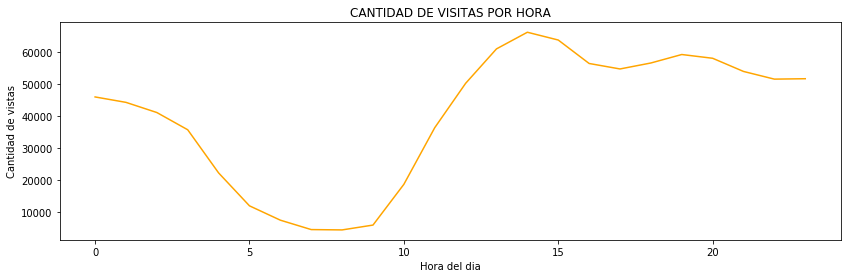

In [114]:
hours_of_a_day.plot(figsize=(14,4),title='CANTIDAD DE VISITAS POR HORA', color = 'orange');
ax=plt.gca()
ax.set_ylabel('Cantidad de vistas')
ax.set_xlabel('Hora del dia')
plt.show()

EN EL HORARIO DE MAS VISITAS CUAl ES EL AVISO CON MAS POSTULACIONES (rango de 12 a 20) (AVISO POSTULANTE FECHA DE POSTULACION )

In [154]:
#me quedo con las postulaciones en el rango de horarios de 12 a 20
data_postulation['fechapostulacion'] = pd.to_datetime(data_postulation['fechapostulacion'], format = '%Y-%m-%d %H:%M:%S',errors = 'coerce')
data_postulation1220 = data_postulation[(data_postulation['fechapostulacion'].dt.hour > 12) & (data_postulation['fechapostulacion'].dt.hour < 20)]
data_postulation1220.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
4,1112237522,5awk,2018-01-25 18:55:03
5,1112277633,5awk,2018-01-29 13:34:44
12,1112315188,5awk,2018-02-28 15:54:28
13,1112346738,5awk,2018-02-28 15:54:47


In [155]:
#avisos con mas postulaciones en el rango de horario 12 a 20
data_postulation1220['idaviso'].value_counts().head(20)

1112345900    3539
1112334791    3324
1112319451    3024
1112033906    2852
1112204682    2848
1112262494    2618
1112296264    2553
1112094756    2493
1112316288    2480
1112298966    2374
1112349037    2353
1112334788    2317
1112260584    2249
1112305277    2189
1112280937    2155
1112347329    2058
1112303105    2032
1112307266    2011
1112344973    1948
1112293625    1948
Name: idaviso, dtype: int64

AREA CON MAS VISITAS EN EL RANGO DE HORARIO 12 A 20

In [151]:
#me quedo con las visitas en el rango horario de 12 a 20 y calcuo el area mas visitada
data_views1220 = data_views[(data_views['timestamp'].dt.hour > 12) & (data_views['timestamp'].dt.hour < 20)]
data_views1220.columns = ['idaviso','timestamp','idpostulante']
data_views1220 = pd.merge(data_views1220,data_ads_details,on='idaviso')
data_views1220['nombre_area'].value_counts()

Ventas                                   53556
Administración                           48841
Producción                               27862
Comercial                                25296
Atención al Cliente                      21392
Recepcionista                            20559
Call Center                              14590
Telemarketing                            10815
Tesorería                                 9850
Mantenimiento y Limpieza                  9472
Contabilidad                              8638
Recursos Humanos                          7912
Secretaria                                5894
Almacén / Depósito / Expedición           5796
Gastronomia                               5612
Farmacéutica                              5558
Camareros                                 5046
Legal                                     5038
Administración de Personal                4716
Créditos y Cobranzas                      4312
Logística                                 4146
Otros        

TRABAJO CON MAS VISTAS EN EL HORARIO DE 12 A 20

In [152]:
#titulo de trabajo con mas vistas entre las 12 y 20
data_views1220['titulo'].value_counts()

Recepcionista Administrativa                                                  2151
Administrativo General Para Importante Obra social                            1776
Representantes de Atención al Cliente Part Time Mañana y Tarde                1683
Recepcionista/Asistente Administrativa                                        1615
Cajero de Sucursal - Contrato a Plazo Fijo                                    1506
Administrativo Recupero SUR                                                   1484
Administrativo RRHH Eventual                                                  1440
Empleado Administrativo/Contable                                              1408
Operador Telefónico Atención al Cliente - Turno mañana (hasta 15hrs)          1354
Empleado Administrativo part time                                             1321
Representante de Atención al Cliente                                          1312
cajeras y repositores                                                         1229
Rece